# **PREDICTING DIABETES USING MACHINE LEARNING**

Problem Statement:

By using these patient records, we will try to build a Machine Learning model to accurately predict whether or not the patients in the dataset have diabetes or not

Data Description

Columns:
  Pregnancies: Number of times pregnant

  Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test

  BloodPressure: Diastolic blood pressure (mm HG)

  SkinThickness: Triceps skin folds thickness (mm)

  Insulin: 2-Hours serum insulin (mu U/ml)

  BMI: body Mass index (weight in kg/(height in m)^2)

  DiabetesPedigreeFunction: Diabetes Pedigree function

  Age: Age(years)

  Outcome: Class Variable (0 or 1) 268 of 768 are 1, the others are 0

**# IMPORTING LIBRARIES**

In [146]:
#Data Cleaning and analysis
import numpy as np
import pandas as pd
#Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from mlxtend.plotting import plot_decision_regions
#Visualize missing values
import missingno as msno
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

### **Reading the Data From the CSV file**

In [147]:
diabetes_df = pd.read_csv(r'C:\Users\ameya\Desktop\projects\diabetes_detct_ml\diabetes - diabetes.csv')

In [148]:
diabetes_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### **Exploratory Data Analysis (EDA)**

In [149]:
#Total number of columns in the dataset
diabetes_df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [150]:
#Information about the dataset
diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [151]:
#To know more about the dataset
diabetes_df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [152]:
#To Know more about the dataset with tranpose
diabetes_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [153]:
#Checking if there is some null values or not
diabetes_df.isnull()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
763,False,False,False,False,False,False,False,False,False
764,False,False,False,False,False,False,False,False,False
765,False,False,False,False,False,False,False,False,False
766,False,False,False,False,False,False,False,False,False


In [154]:
#Checking if there is some null values or not
diabetes_df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

On these Columns, some variables like: Glucose, BloodPressure, SkinThickness, Insulin, BMI have an invalid zero value. it is better to replace them with NAN

In [155]:
diabetes_df_copy= diabetes_df.copy(deep=True)
diabetes_df_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = diabetes_df_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.nan)

#Showing the Count of NANs
print(diabetes_df_copy.isnull().sum())

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


### **Data Visualization**

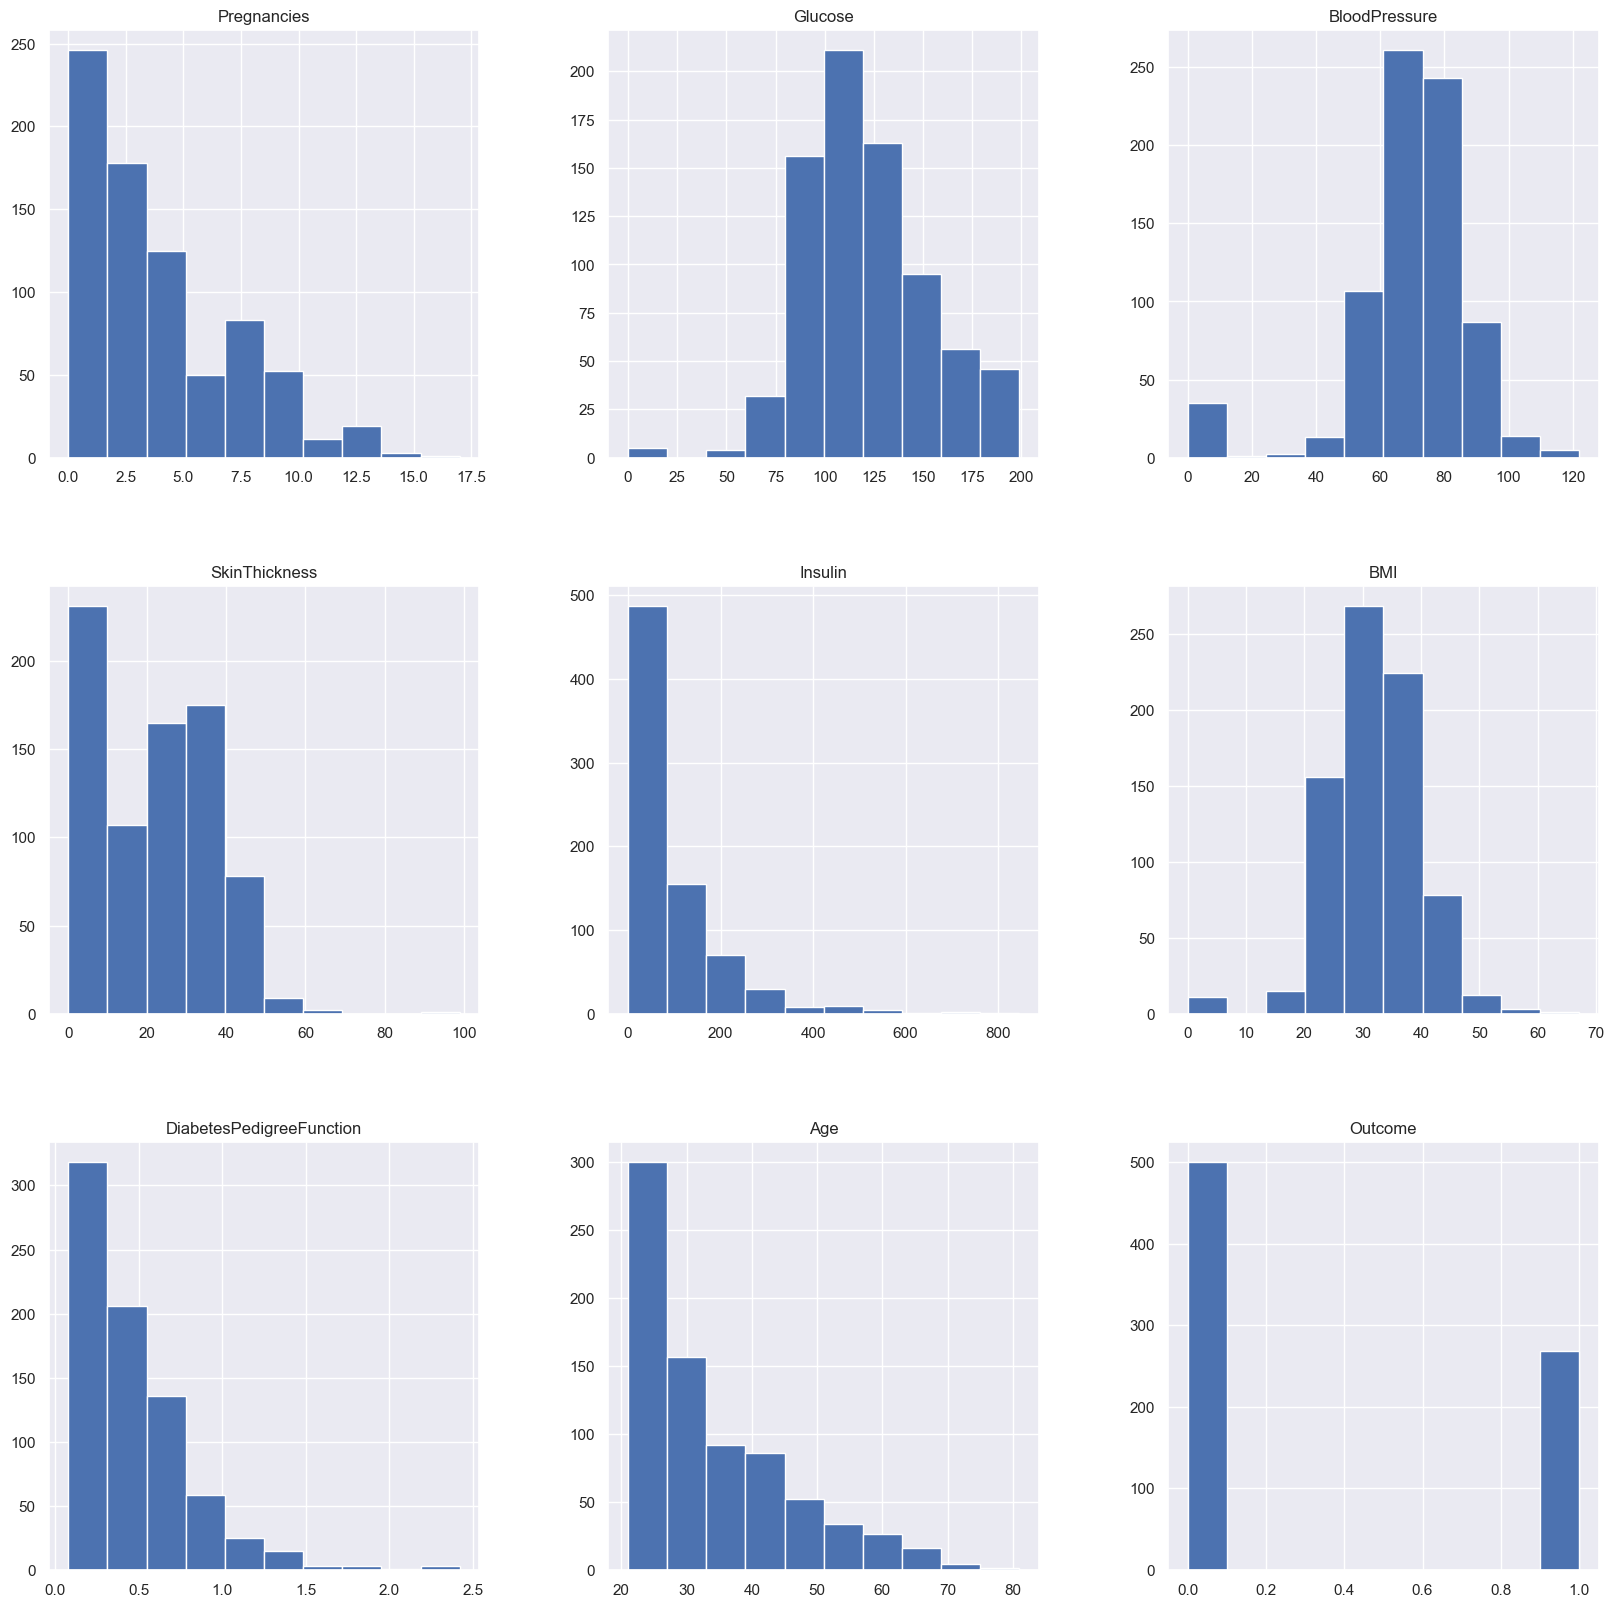

In [156]:
#Plotting the data distribution plots
p = diabetes_df.hist(figsize=(20,20))

In [157]:
#Aiming to impute NAN values for the columns in accordance with their distribution 
diabetes_df_copy['Glucose'].fillna(diabetes_df_copy['Glucose'].mean(),inplace=True)
diabetes_df_copy['BloodPressure'].fillna(diabetes_df_copy['BloodPressure'].mean(),inplace=True)
diabetes_df_copy['SkinThickness'].fillna(diabetes_df_copy['SkinThickness'].median(),inplace=True)
diabetes_df_copy['Insulin'].fillna(diabetes_df_copy['Insulin'].median(),inplace=True)
diabetes_df_copy['BMI'].fillna(diabetes_df_copy['BMI'].median(),inplace=True)

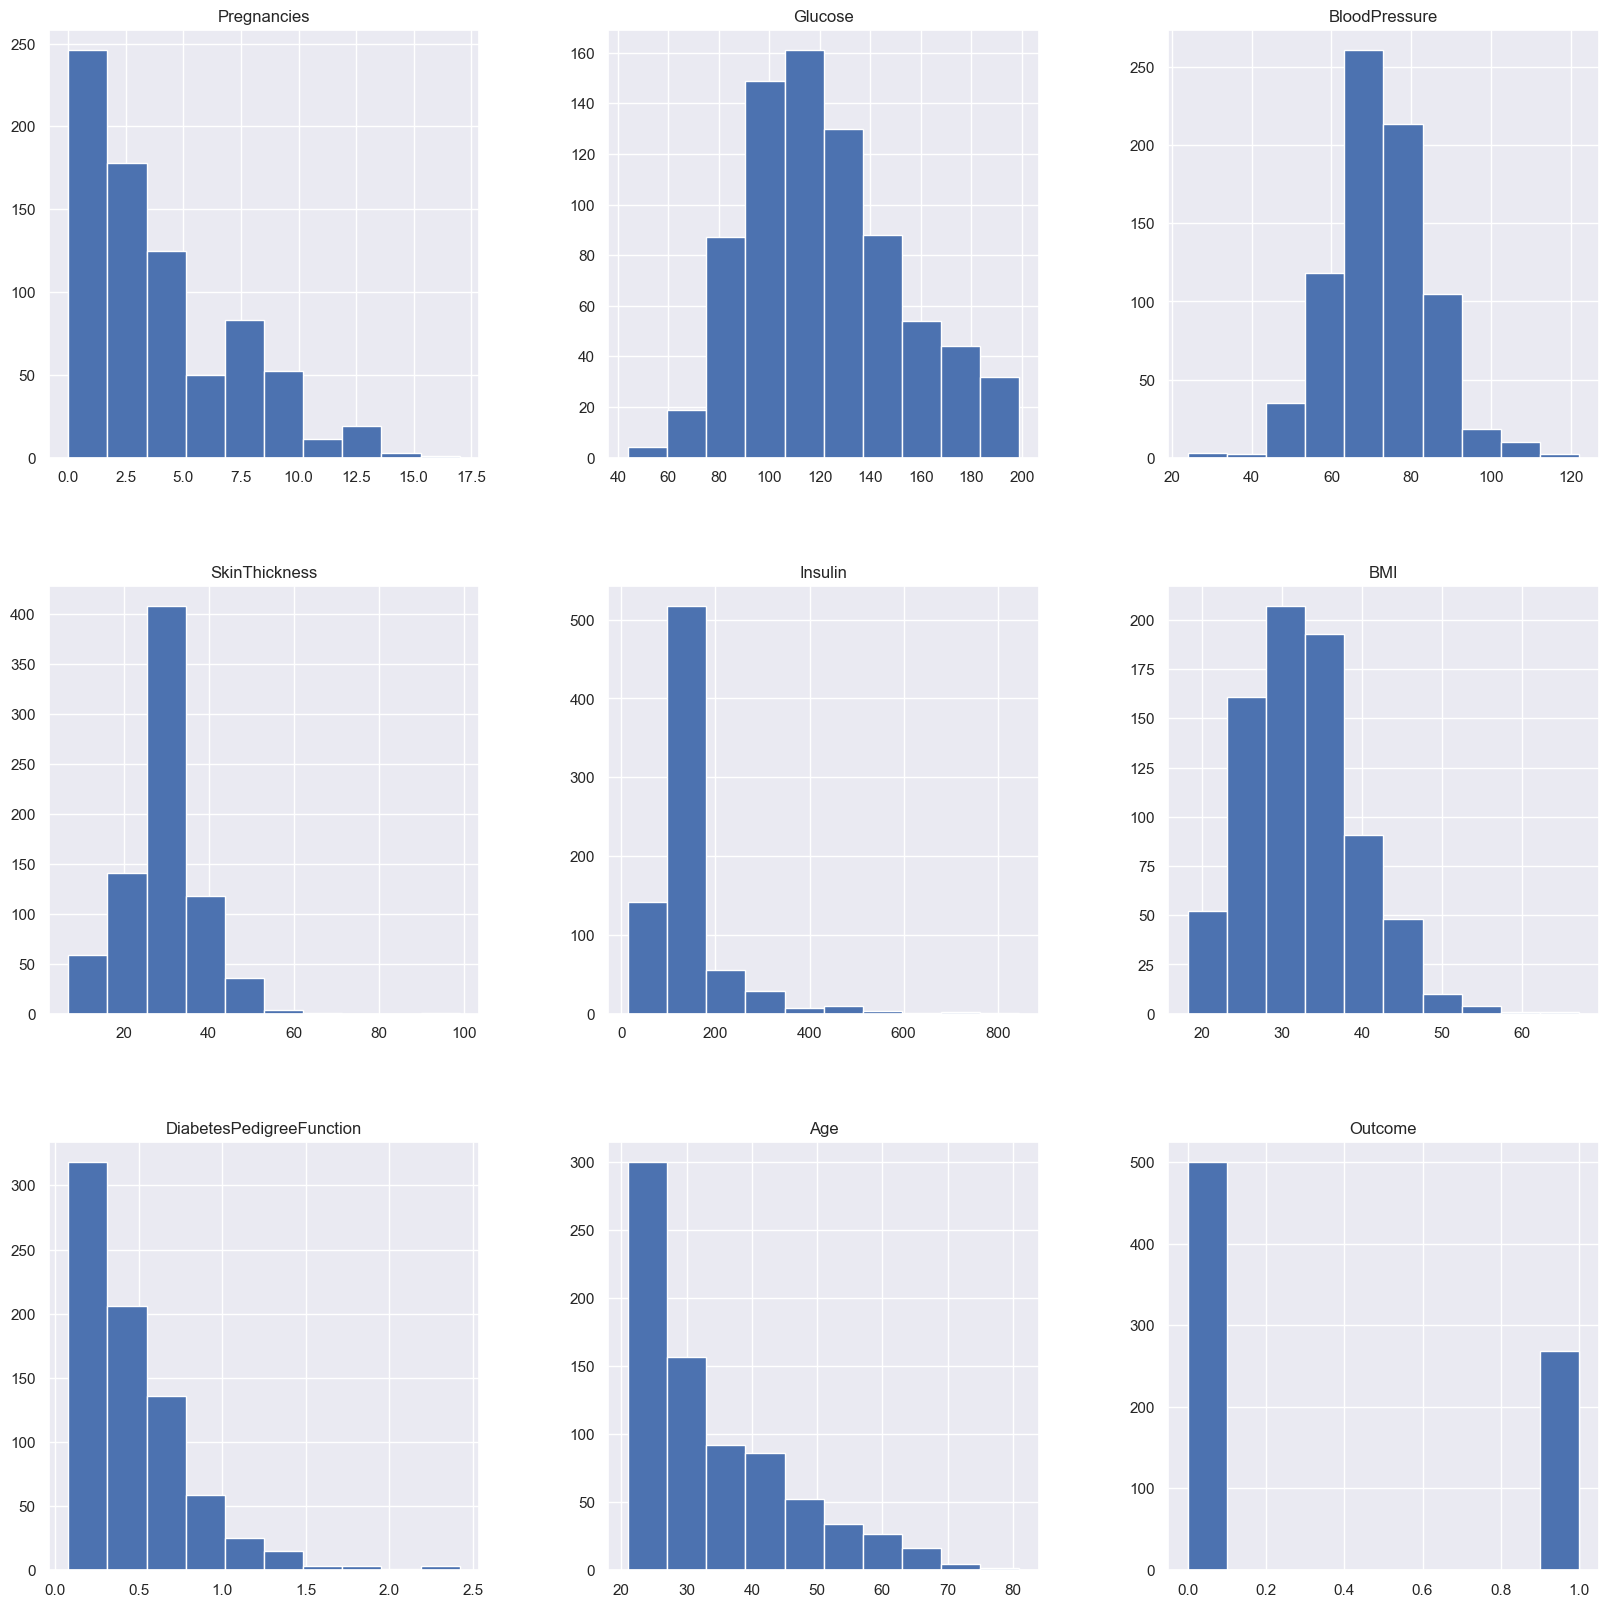

In [158]:
#Plotting the distributions after removing the NAN values
p = diabetes_df_copy.hist(figsize=(20,20))

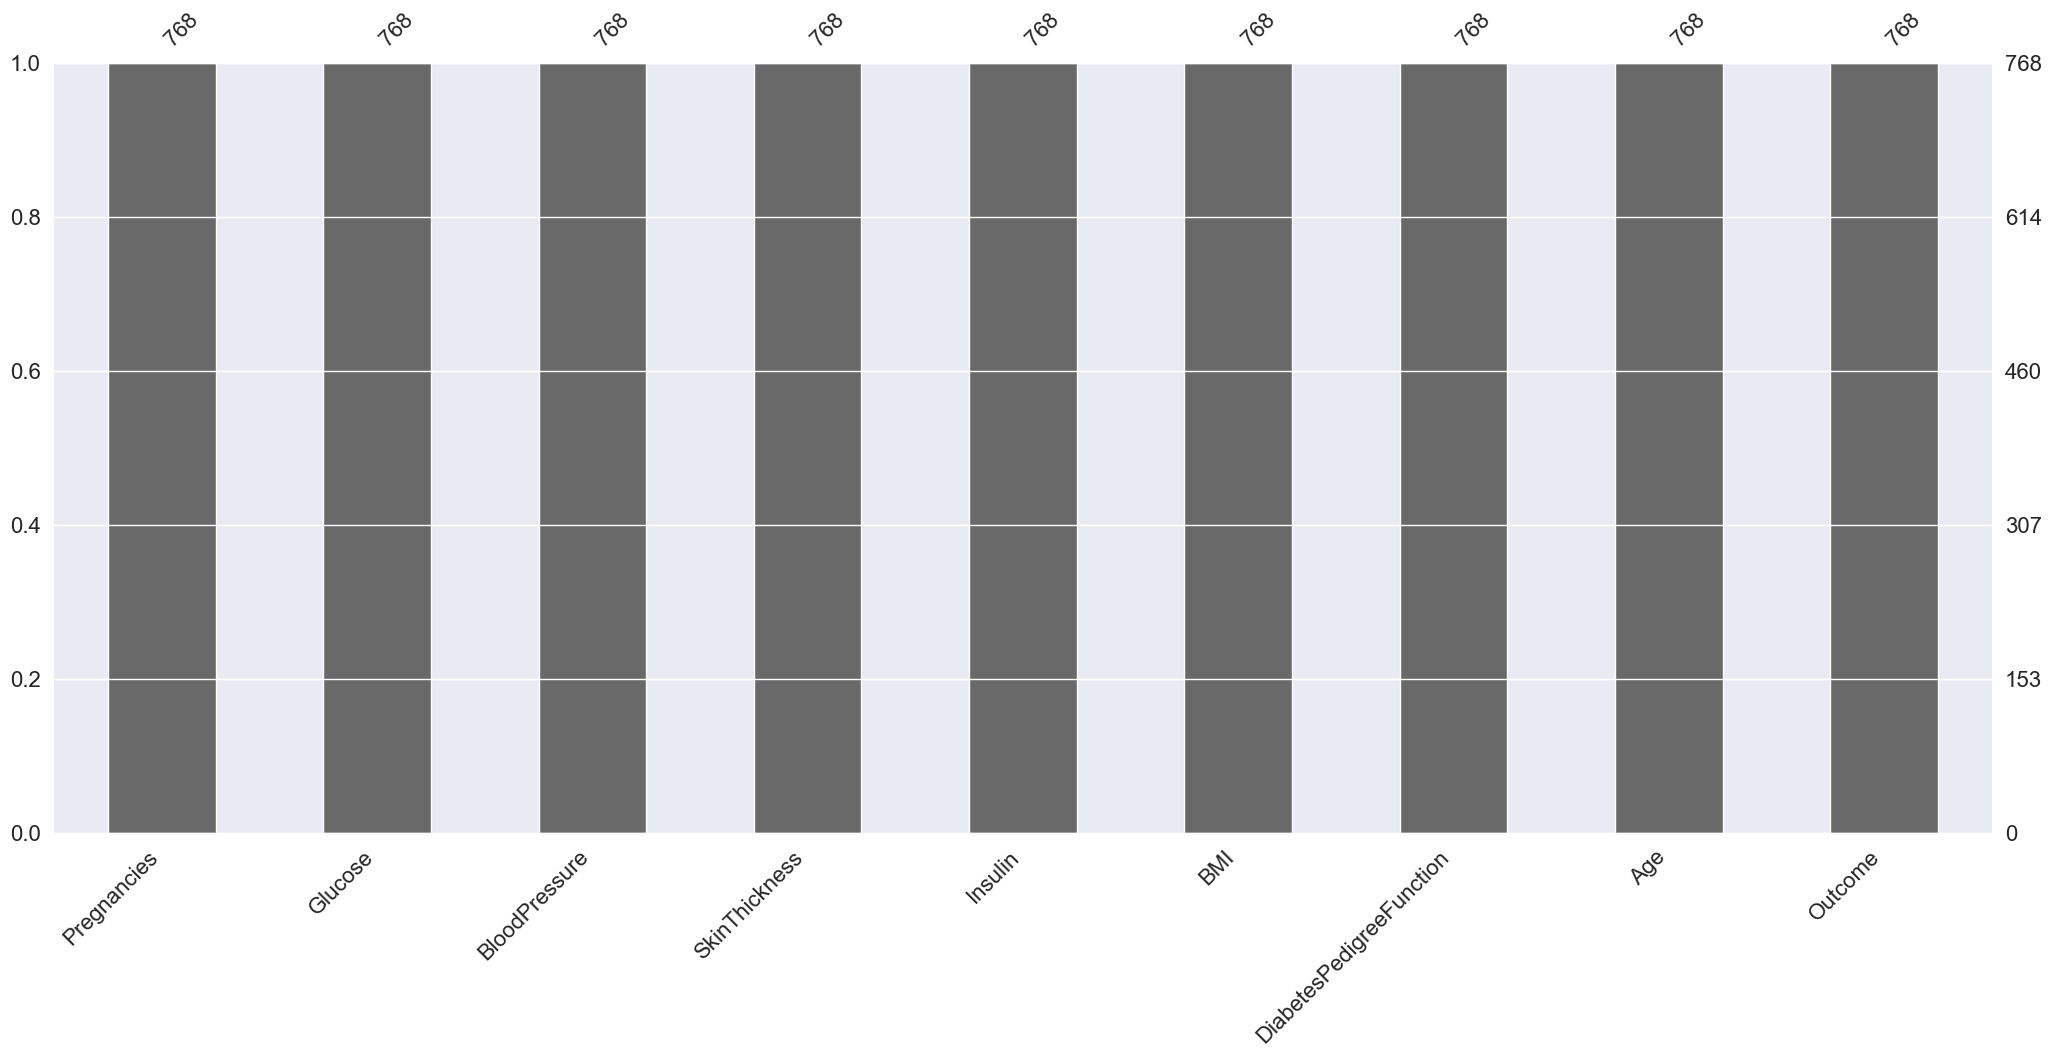

In [159]:
#Plotting Null Count Analysis Plot
p = msno.bar(diabetes_df)

Outcome
0    500
1    268
Name: count, dtype: int64


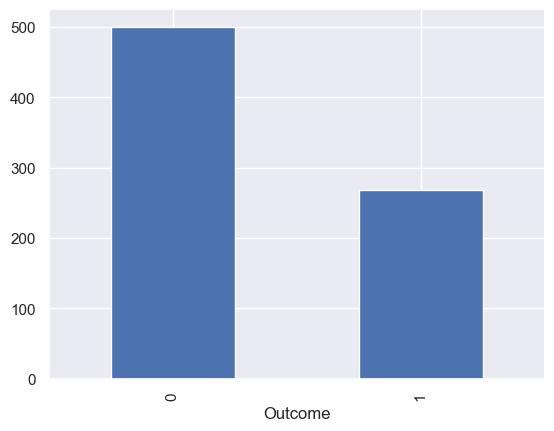

In [160]:
# Checking the balance of the data by plotting the count of outcomes by their
color_wheel = {1: "#0392cf", 2: "7bc043"}
colors = diabetes_df["Outcome"].map(lambda x: color_wheel.get(x + 1))
print(diabetes_df.Outcome.value_counts())
p = diabetes_df.Outcome.value_counts().plot(kind="bar")

The above graph shows that the data is biased towards datapoints having outcomes value as 0 where it means that diabetes was not present actually. The number of non-diabetes is almost twice the no of diabetics patients

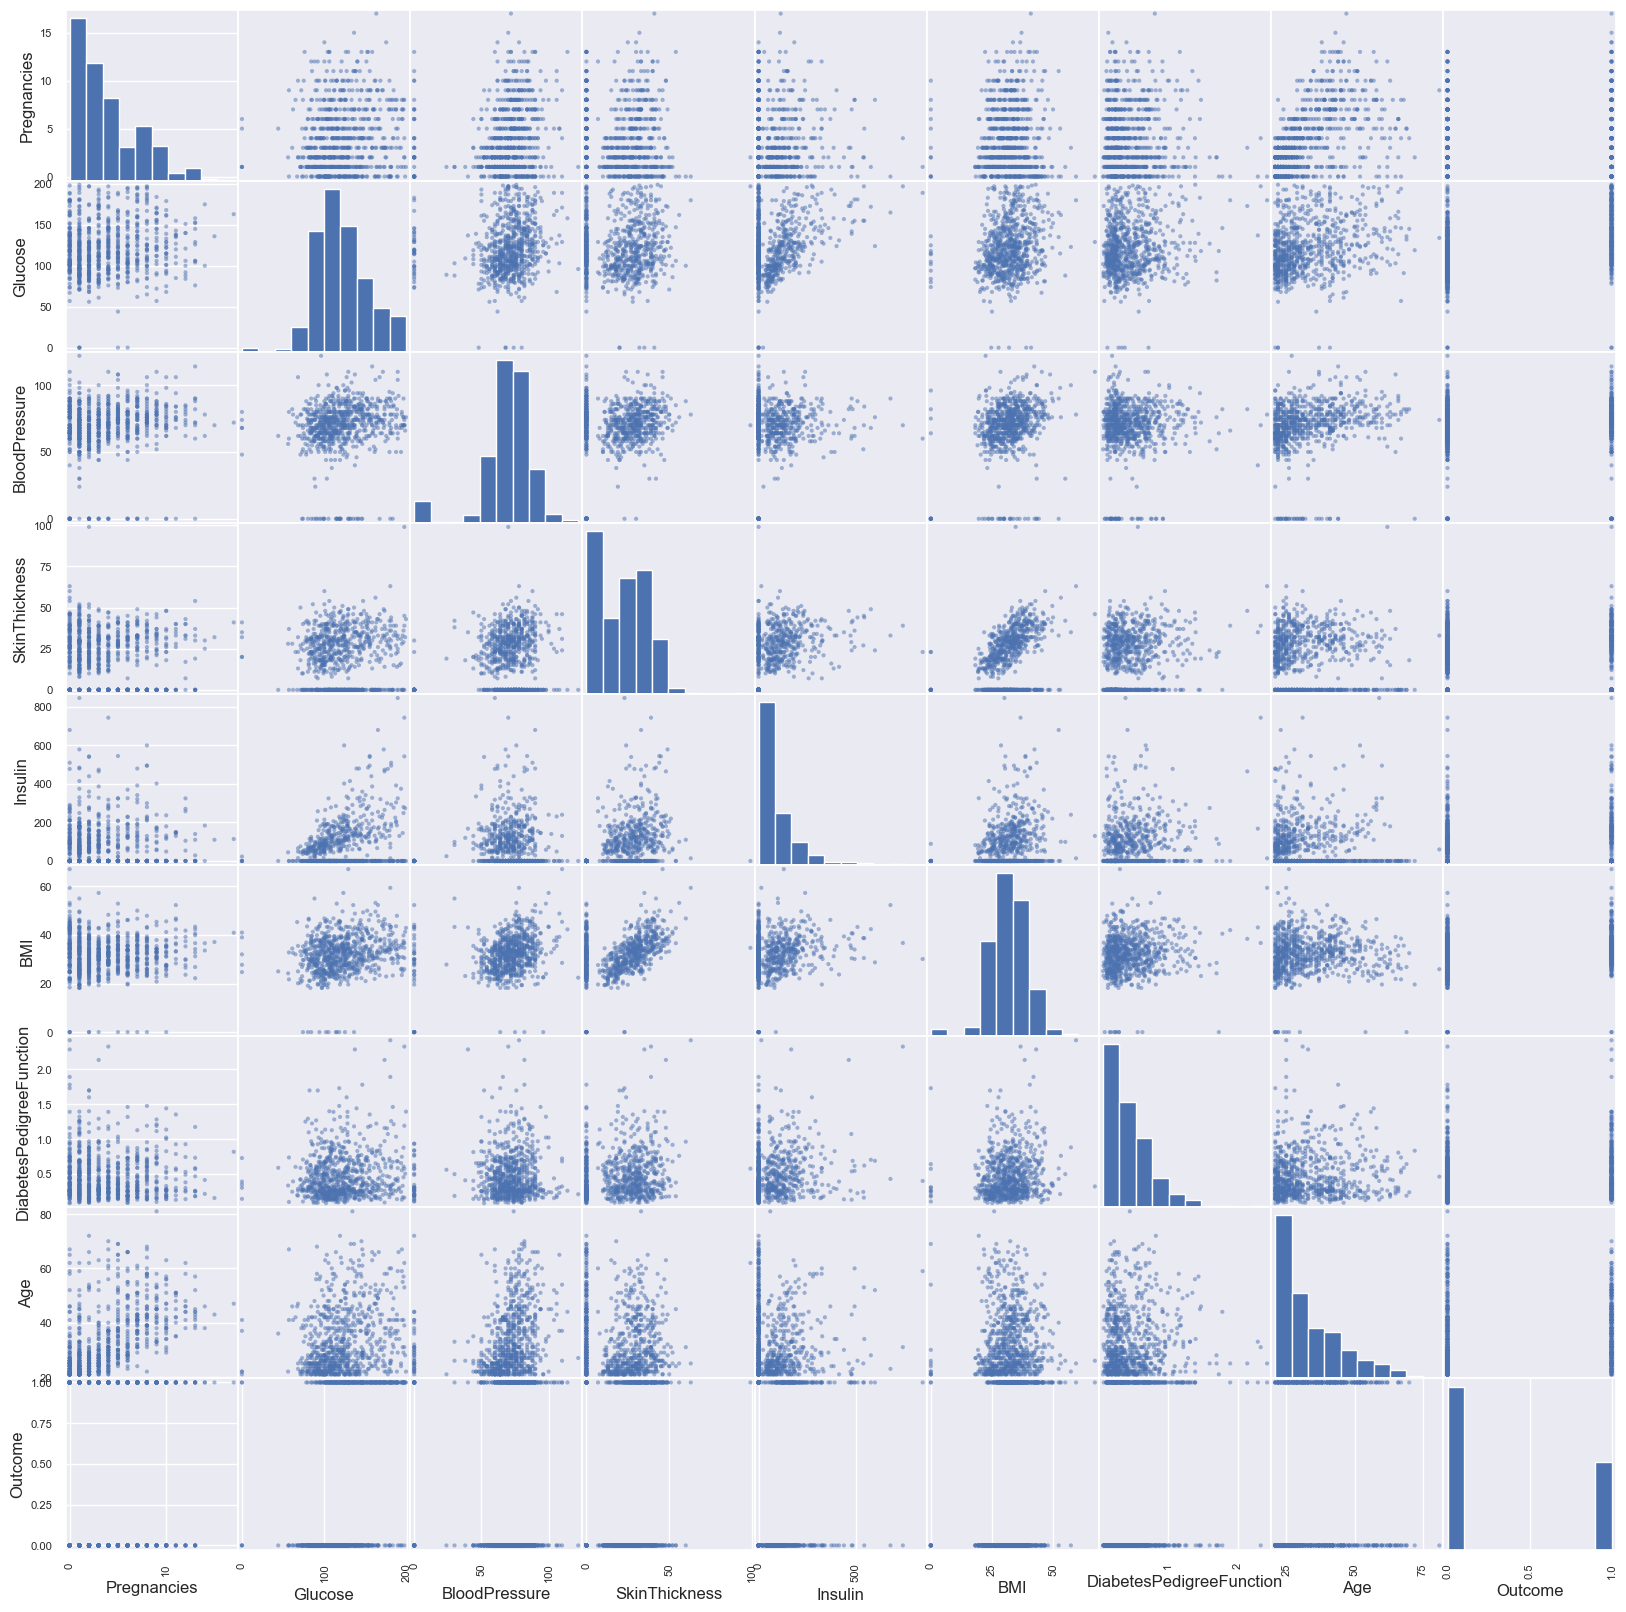

In [161]:
#Plotting a Scatter matrix of uncleaned data
p = scatter_matrix(diabetes_df,figsize=(20,20))

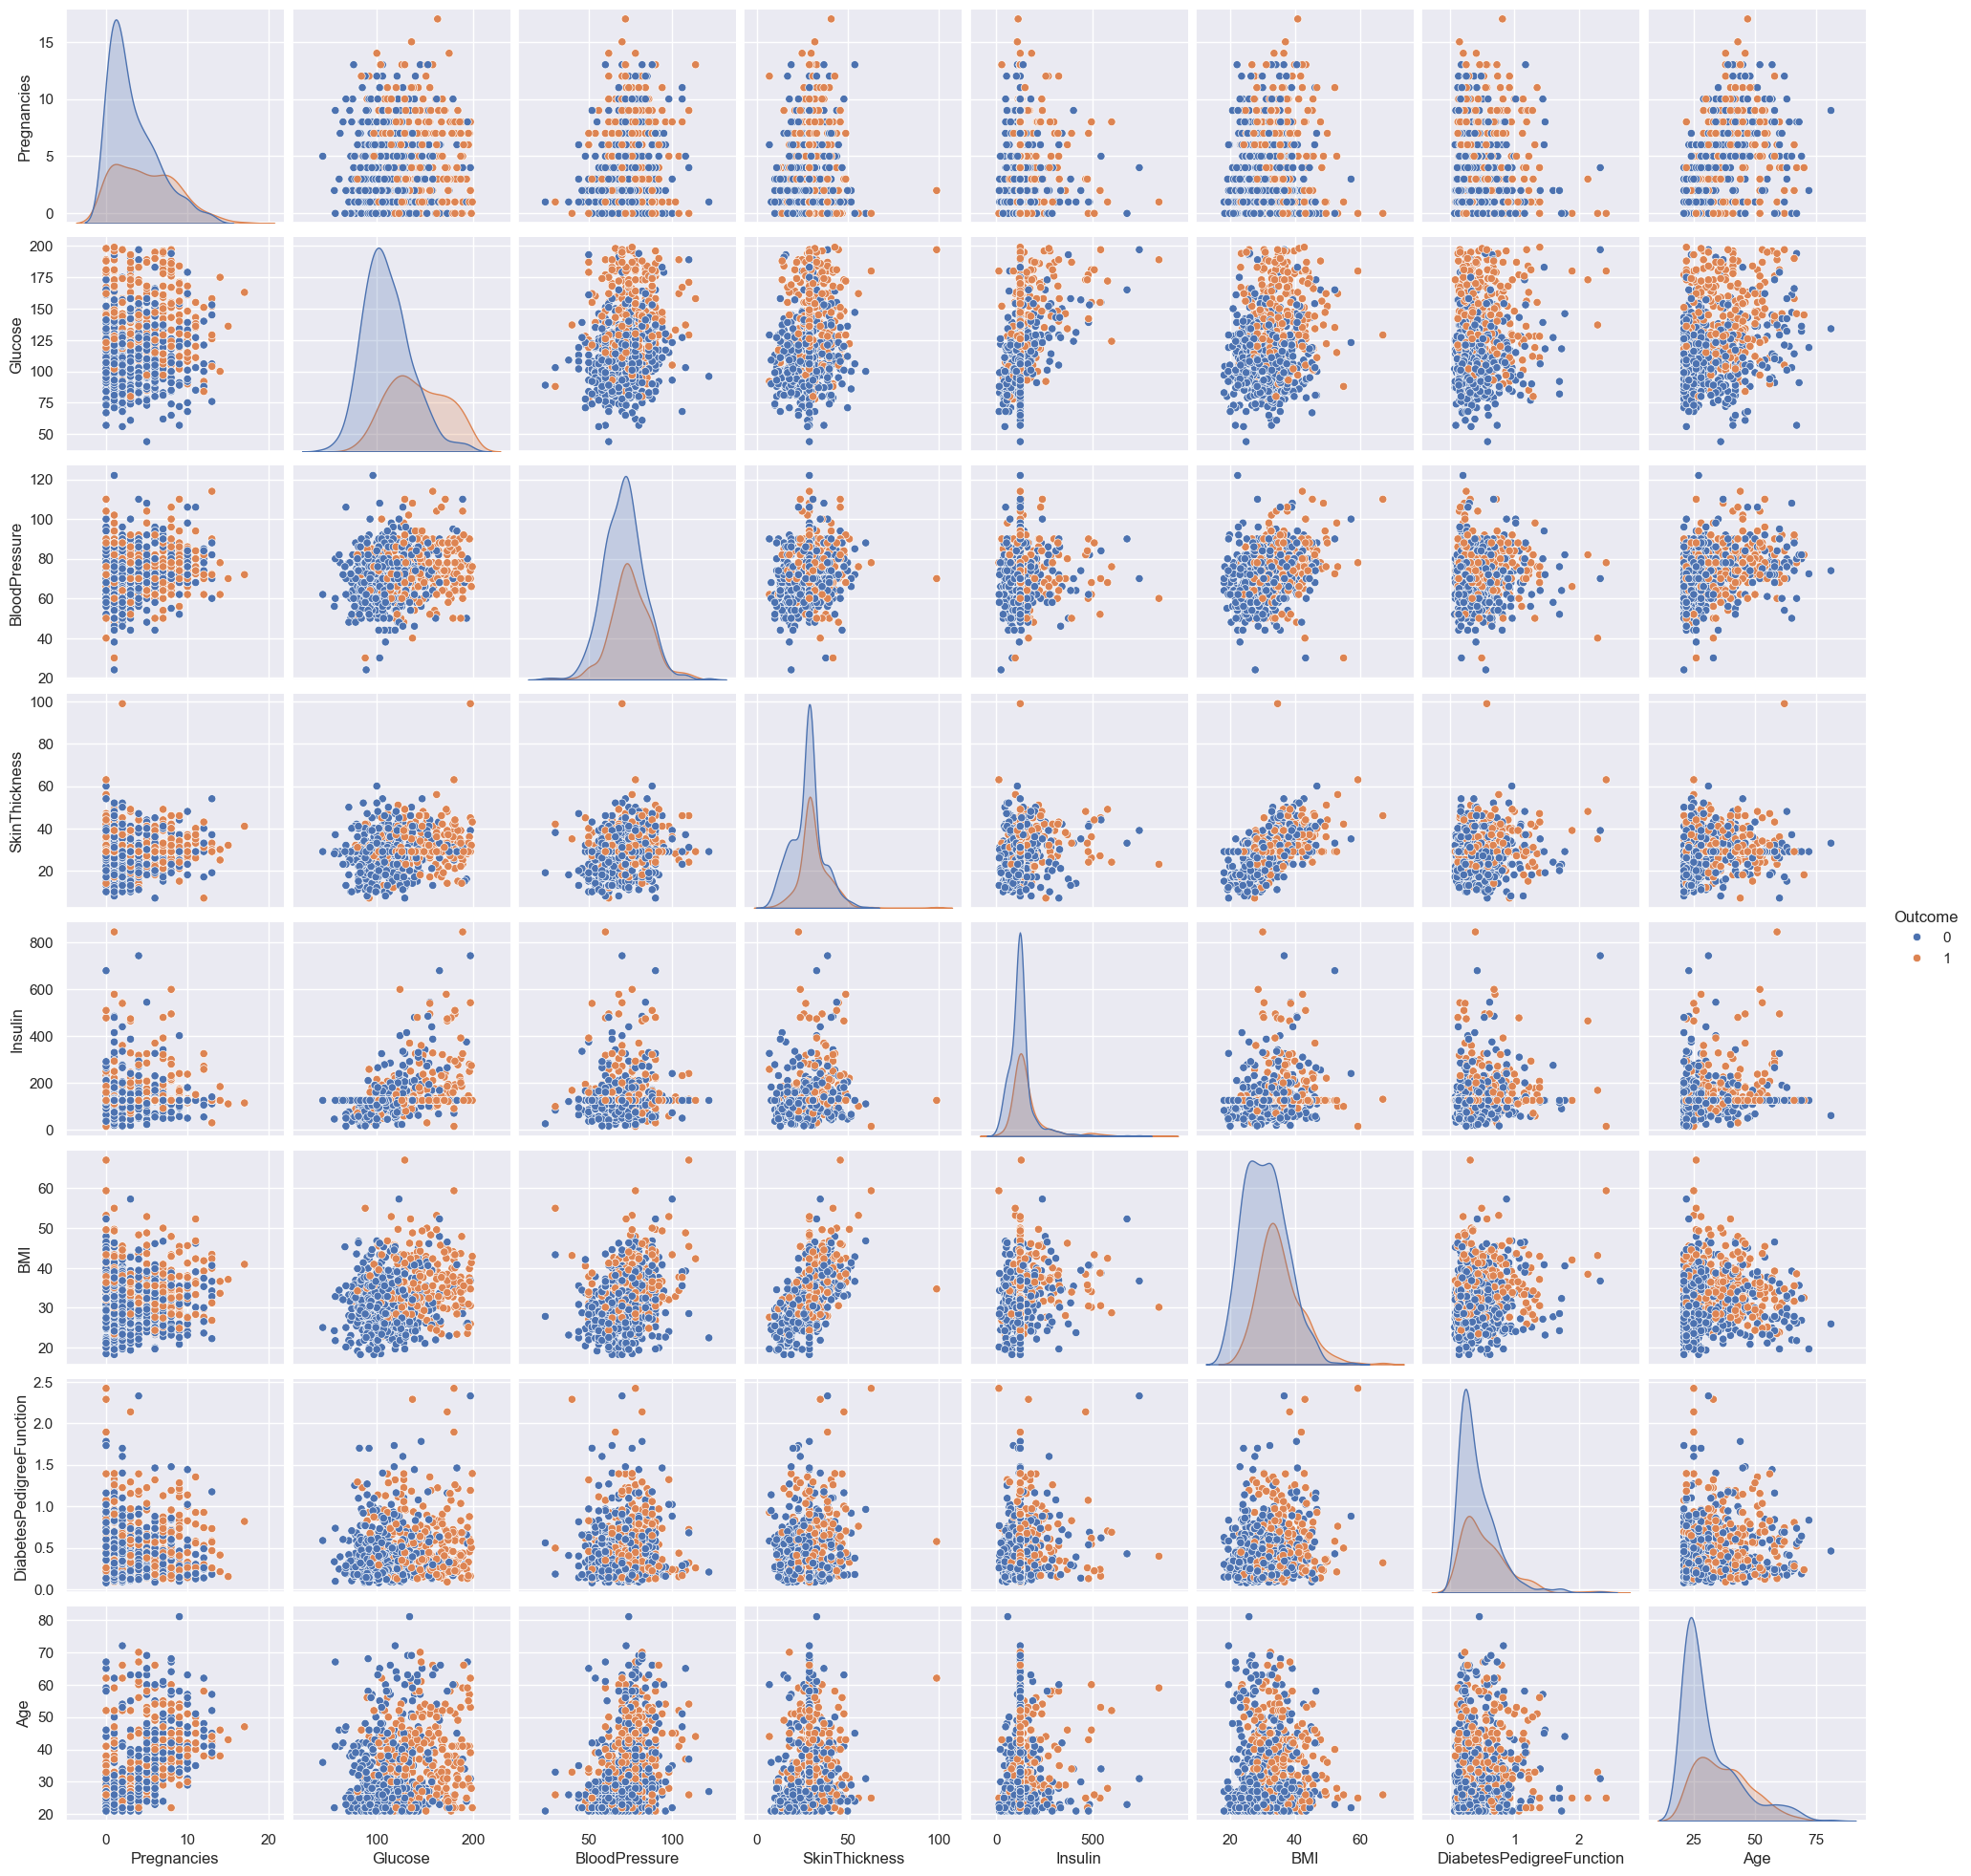

In [162]:
# Plotting the pair plots for the data
p = sns.pairplot(diabetes_df_copy, hue='Outcome')

###  **Correlation between all the features**

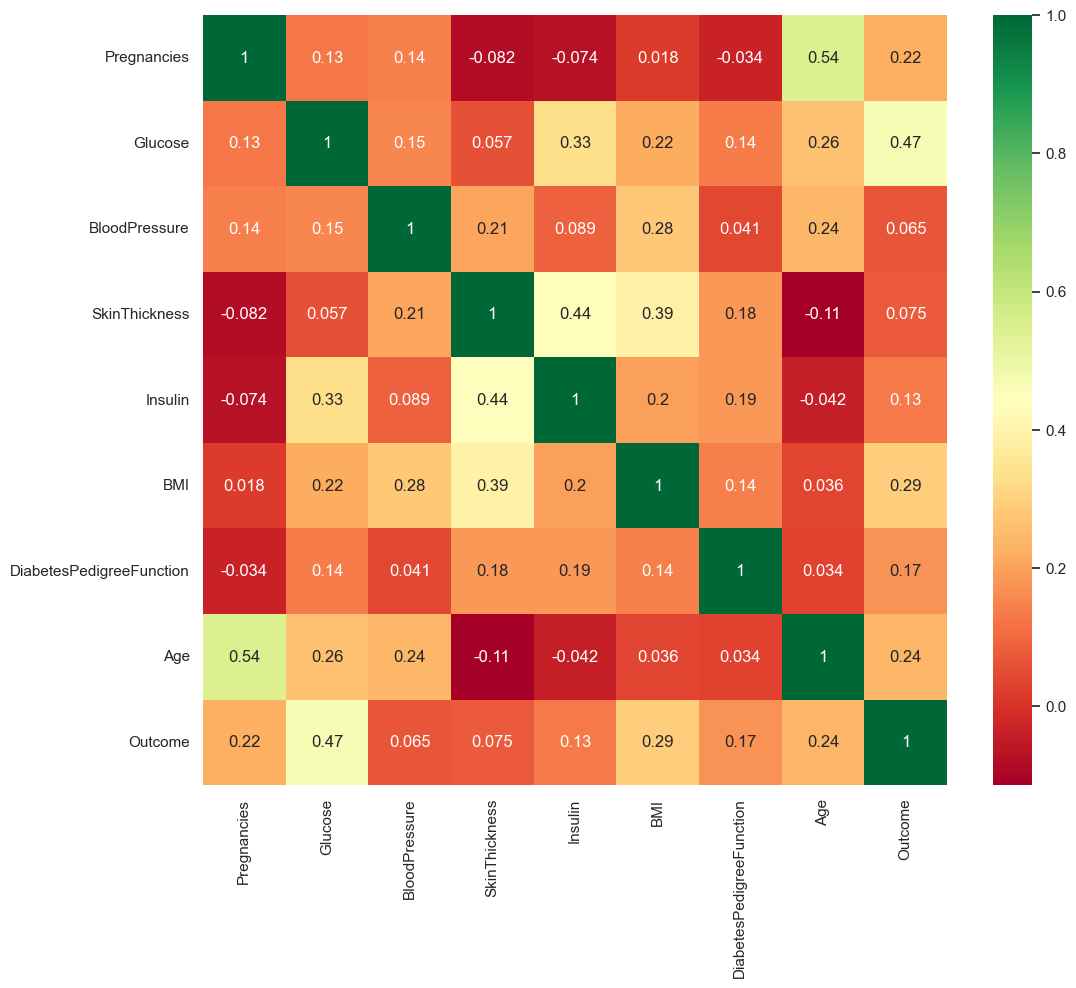

In [163]:
# Correlation between all the features before CLeaning
plt.figure(figsize=(12,10))
p = sns.heatmap(diabetes_df.corr(), annot=True,cmap='RdYlGn')

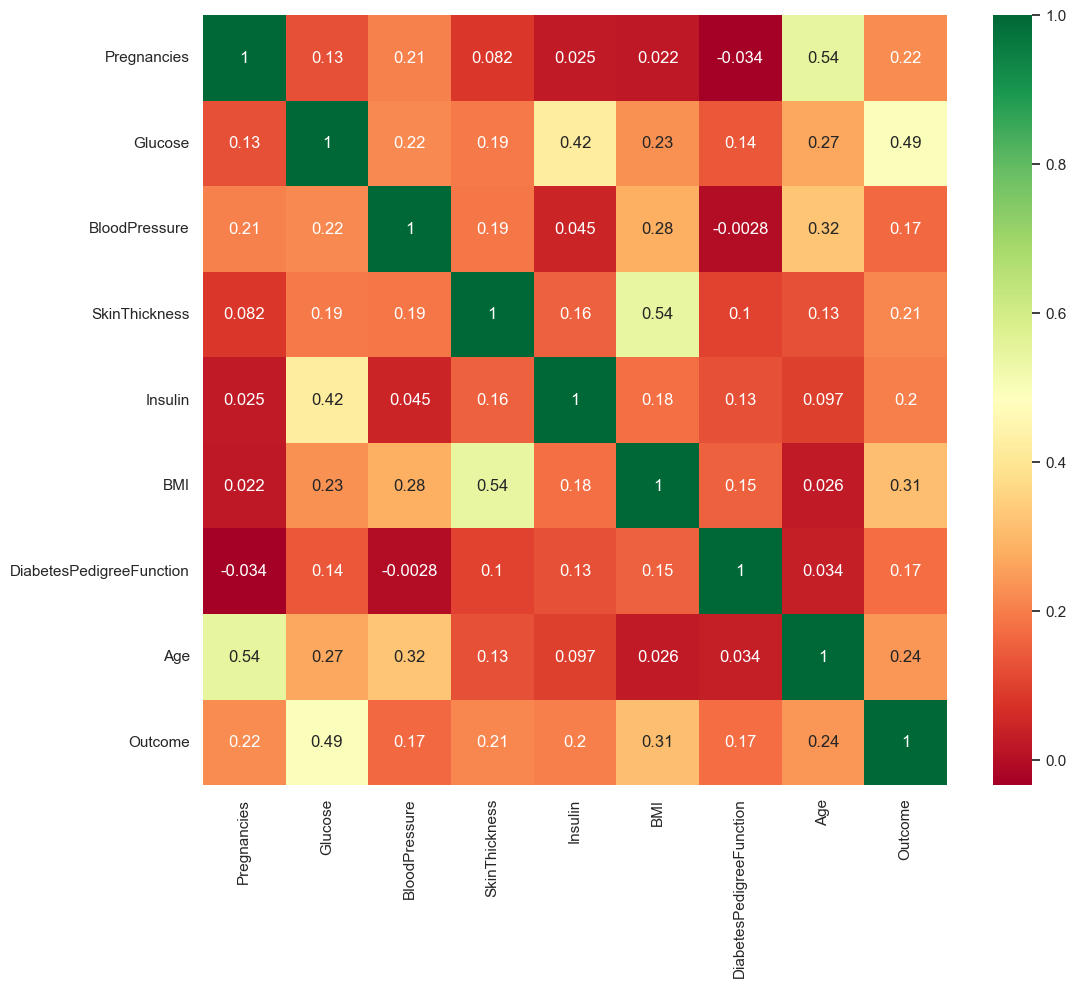

In [164]:
#Correlation betweeen all the features after cleaning
plt.figure(figsize=(12,10))
p=sns.heatmap(diabetes_df_copy.corr(), annot=True,cmap='RdYlGn')

### **Scaling the data**

In [165]:
diabetes_df_copy.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31,0
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [166]:
sc_X = StandardScaler()
X  = pd.DataFrame(sc_X.fit_transform(diabetes_df_copy.drop(["Outcome"],axis=1),), columns=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedegreeFunction', 'Age'])
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedegreeFunction,Age
0,0.639947,0.865108,-0.033518,0.670643,-0.181541,0.166619,0.468492,1.425995
1,-0.844885,-1.206162,-0.529859,-0.012301,-0.181541,-0.852200,-0.365061,-0.190672
2,1.233880,2.015813,-0.695306,-0.012301,-0.181541,-1.332500,0.604397,-0.105584
3,-0.844885,-1.074652,-0.529859,-0.695245,-0.540642,-0.633881,-0.920763,-1.041549
4,-1.141852,0.503458,-2.680669,0.670643,0.316566,1.549303,5.484909,-0.020496


In [167]:
y = diabetes_df_copy.Outcome

In [168]:
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

### **Spliting the Data into Train and Test**

In [169]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=1/3,random_state=42, stratify=y)

## **Model Building**

### **K-Nearest Neighbour(KNN)**

In [170]:
test_scores = []
train_scores = []

for i in range (1,15):
  knn = KNeighborsClassifier(i)
  knn.fit(X_train,y_train)
  
  train_scores.append(knn.score(X_train,y_train))
  test_scores.append(knn.score(X_test,y_test))

In [171]:
train_scores

[1.0,
 0.84375,
 0.8671875,
 0.8359375,
 0.828125,
 0.8046875,
 0.814453125,
 0.802734375,
 0.798828125,
 0.802734375,
 0.798828125,
 0.79296875,
 0.794921875,
 0.796875]

In [172]:
test_scores

[0.73046875,
 0.73046875,
 0.74609375,
 0.7421875,
 0.7421875,
 0.72265625,
 0.74609375,
 0.74609375,
 0.74609375,
 0.73046875,
 0.765625,
 0.734375,
 0.75,
 0.734375]

In [173]:
max_train_score = max(train_scores)
train_scores_ind = [i for i, v in enumerate(train_scores) if v == max_train_score]
print('Max train score {} % and k = {}' .format(max_train_score*100,list(map(lambda x: x+1, train_scores_ind))))

Max train score 100.0 % and k = [1]


In [174]:
## score that comes from testing on the datapoints that were split in the beginning
max_test_score = max(test_scores)
test_scores_ind = [i for i, v in enumerate(test_scores) if v == max_test_score]
print('Max test score {} % and k = {}' .format(max_test_score*100,list(map(lambda x: x+1, test_scores_ind))))

Max test score 76.5625 % and k = [11]


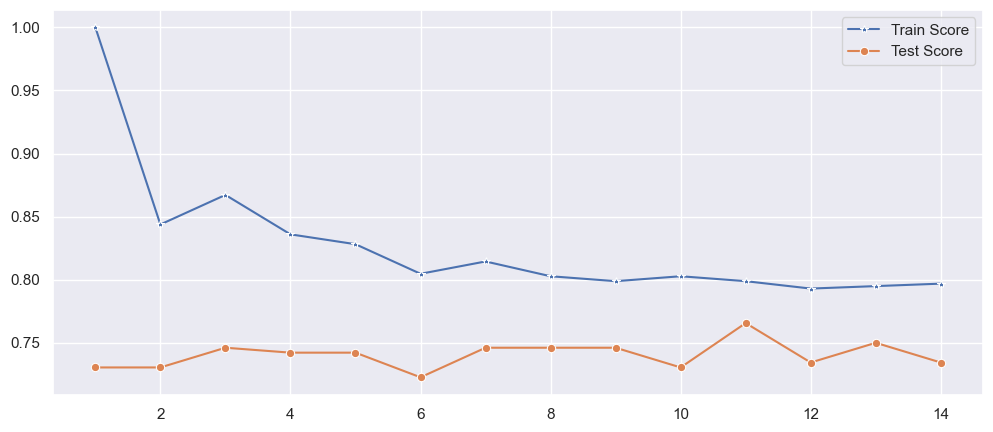

In [175]:
plt.figure(figsize=(12,5))
p = sns.lineplot(x=range(1,15),y=train_scores,marker='*',label= 'Train Score')
p = sns.lineplot(x=range(1,15),y=test_scores,marker='o',label= 'Test Score')

the best result is captured at k = 11 hence 11 is used for the final model

In [176]:
knn = KNeighborsClassifier(11)
knn.fit(X_train,y_train)
knn.score(X_test,y_test)

0.765625

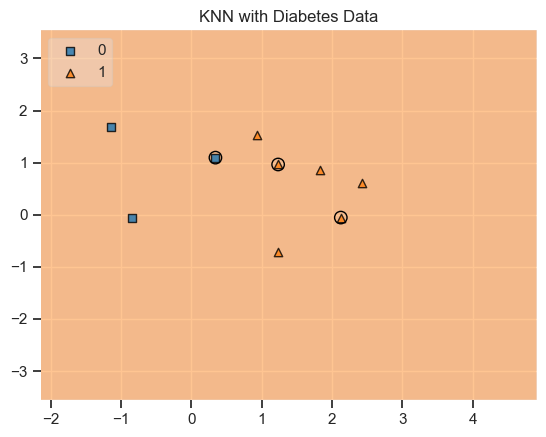

In [177]:
#Plot the Decision Boundary
value = 20000
width = 20000
plot_decision_regions(X.values, y.values, clf=knn, legend=2,
                      filler_feature_values={2: value, 3: value, 4: value, 5: value, 6: value, 7: value},
                      filler_feature_ranges={2: width, 3: width, 4: width, 5: width, 6: width, 7: width},
                      X_highlight=X_test.values)

plt.title('KNN with Diabetes Data')
plt.show()

### **Confusion Matrix**

Text(0.5, 20.049999999999997, 'Predicted label')

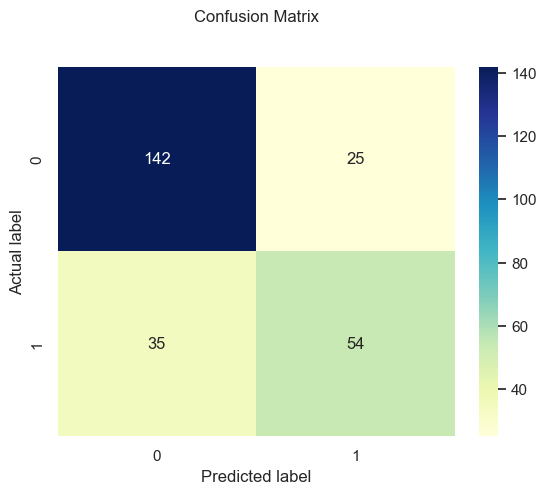

In [178]:
y_pred = knn.predict(X_test)

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
p =sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')
plt.title('Confusion Matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [179]:
#Classification Reports
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.80      0.85      0.83       167
           1       0.68      0.61      0.64        89

    accuracy                           0.77       256
   macro avg       0.74      0.73      0.73       256
weighted avg       0.76      0.77      0.76       256



### **ROC-AUC Curve**

In [180]:
y_pred_proba = knn.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

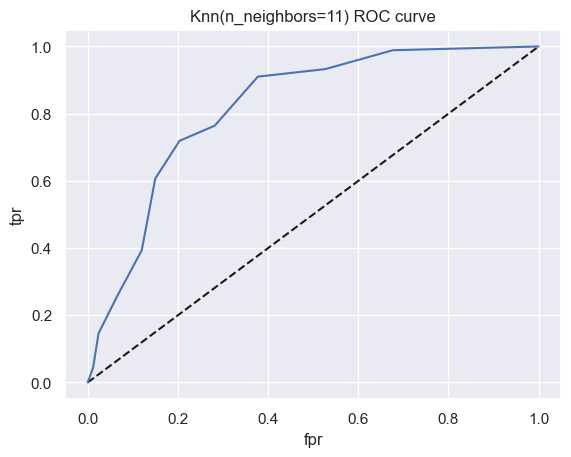

In [181]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Knn')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('Knn(n_neighbors=11) ROC curve')
plt.show()

In [182]:
roc_auc_score(y_test,y_pred_proba)

np.float64(0.8193500639171096)

### **Implementing GridSearchCV**

In [183]:
#In case of Classifier like KNN the parameter to be turned is n_neighbours
param_grid = {'n_neighbors':np.arange(1,50)}
knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn,param_grid,cv=5)
knn_cv.fit(X,y)

print("Best Score: " + str(knn_cv.best_score_))
print("Best Parameters: " + str(knn_cv.best_params_))

Best Score: 0.7721840251252015
Best Parameters: {'n_neighbors': np.int64(25)}
